In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import networkit as nk
import numpy as np
import matplotlib.pyplot as plt
import time
import phate

from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

from External.ICT.calculate_ICT import calculate_ICT, compute_widths
from External.clustering import k_means_pp
from External.generation import create_graph
from External.create_k_nearest import is_connected

from numpy.linalg import norm

plt.style.use('standard.mplstyle')

# Hyperparameters
mode = "K_Nearest+Density2"
metric = "euclidean"
position, labels = phate.tree.gen_dla(n_dim=2, n_branch=3,
                                            branch_length=2500, rand_multiplier=2, seed=37, sigma=1)
position = StandardScaler().fit_transform(position)
number_of_nodes = len(position)

In [3]:
# calculate the cluster centers and the components
ε, δ = 0.03, 0.1
r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
k = int(np.sqrt(r))
k = np.min((k, number_of_nodes))
cluster_centers, labels = k_means_pp(k, position, metric=metric, return_labels=True)
unique_labels = np.unique(labels)


components = []
for label in unique_labels:
    component = np.argwhere(label == labels).T
    assert len(component) == 1
    components.append(component[0])

sub_ICTs = []
for component in tqdm(components):
    
    # othervise choose a smaller k above!
    assert len(component) > 6
    
    sub_number_of_nodes = len(component)
    sub_G, _ = create_graph(sub_number_of_nodes, mode, position=position[component], k=4)
    sub_G.indexEdges()
    k_ = int(np.sqrt(1 / (ε**2) * int(np.log2(sub_number_of_nodes - 1)) + 1 + np.log(1/δ)))
    k = np.min((sub_number_of_nodes, k_))
    sub_cluster_centers = k_means_pp(k, position[component], metric=metric)
    sub_ICT = calculate_ICT(sub_G, algorithm_type="exact_own", cluster_centers=sub_cluster_centers,
                                   zeros_stay_zeros=True, update_G=1.1)
    sub_ICT.indexEdges()
    sub_ICTs.append(sub_ICT)

sklearn is done: 18.091716527938843
My own part is done: 0.06405806541442871



sklearn is done: 0.3454270362854004
My own part is done: 0.0013973712921142578


update Arr 173 -> 80
added 12 edges early
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
added 2 edges early
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 69




sklearn is done: 0.1924433708190918
My own part is done: 0.0008389949798583984


update Arr 131 -> 58
added 9 edges early
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
added 2 edges early
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48




sklearn is done: 0.3971991539001465
My own part is done: 0.0016779899597167969


update Arr 222 -> 112
added 9 edges early
update Arr 112 -> 101
added 3 edges early
update Arr 101 -> 97
added 3 edges early
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 -> 96
update Arr 96 -> 95
added 2 edges early
update Arr 95 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 92
update Arr 92 -> 91
update Arr 91 -> 91
update Arr 91 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 88




sklearn is done: 0.282177209854126
My own part is done: 0.0009996891021728516


update Arr 140 -> 66
added 6 edges early
update Arr 66 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 60
added 2 edges early
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54




sklearn is done: 0.180145263671875
My own part is done: 0.0009341239929199219


update Arr 128 -> 56
added 12 edges early
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49




sklearn is done: 0.11998629570007324
My own part is done: 0.0007307529449462891


update Arr 94 -> 42
added 9 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
added 2 edges early
update Arr 41 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36
added 5 edges early




sklearn is done: 0.30068039894104004
My own part is done: 0.0012390613555908203


update Arr 162 -> 72
added 8 edges early
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
added 2 edges early
update Arr 66 -> 65
added 2 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
added 10 edges early




sklearn is done: 0.20511293411254883
My own part is done: 0.0010330677032470703


update Arr 134 -> 55
added 14 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 52
added 2 edges early




sklearn is done: 0.4002227783203125
My own part is done: 0.001550436019897461


update Arr 263 -> 116
added 21 edges early
update Arr 116 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
added 2 edges early
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 109
added 2 edges early
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 


sklearn is done: 0.3912348747253418
My own part is done: 0.00152587890625


update Arr 194 -> 89
added 15 edges early
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 87
update Arr 87 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 7


sklearn is done: 0.13102388381958008
My own part is done: 0.0008130073547363281


update Arr 105 -> 46
added 8 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 39




sklearn is done: 0.28405308723449707
My own part is done: 0.0011758804321289062


update Arr 150 -> 70
added 12 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.1299278736114502
My own part is done: 0.0007927417755126953


update Arr 103 -> 46
added 9 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
added 10 edges early




sklearn is done: 0.2937278747558594
My own part is done: 0.0012345314025878906


update Arr 159 -> 71
added 10 edges early
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.35706615447998047
My own part is done: 0.0013463497161865234


update Arr 188 -> 87
added 16 edges early
update Arr 87 -> 85
update Arr 85 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
added 2 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 77
added 2 edges early
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75




sklearn is done: 0.30296874046325684
My own part is done: 0.001306295394897461


update Arr 162 -> 70
added 14 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 64




sklearn is done: 0.2591280937194824
My own part is done: 0.0017027854919433594


update Arr 135 -> 62
added 11 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
added 2 edges early
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55




sklearn is done: 0.3923211097717285
My own part is done: 0.0015692710876464844


update Arr 250 -> 114
added 15 edges early
update Arr 114 -> 113
added 2 edges early
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 111
update Arr 111 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 10


sklearn is done: 0.06000161170959473
My own part is done: 0.0004773139953613281


update Arr 42 -> 30
added 2 edges early
update Arr 30 -> 27
added 2 edges early
update Arr 27 -> 25
update Arr 25 -> 22
update Arr 22 -> 22
update Arr 22 -> 19
update Arr 19 -> 18
update Arr 18 -> 16




sklearn is done: 0.1083831787109375
My own part is done: 0.0006744861602783203


update Arr 90 -> 44
added 4 edges early
update Arr 44 -> 42
added 3 edges early
update Arr 42 -> 42
update Arr 42 -> 40
update Arr 40 -> 38
update Arr 38 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 33
update Arr 33 -> 32




sklearn is done: 0.20456457138061523
My own part is done: 0.0010700225830078125


update Arr 138 -> 60
added 11 edges early
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.2725503444671631
My own part is done: 0.001142263412475586


update Arr 153 -> 69
added 10 edges early
update Arr 69 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.5358786582946777
My own part is done: 0.0017383098602294922


update Arr 274 -> 126
added 17 edges early
update Arr 126 -> 120
added 3 edges early
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 120
update Arr 120 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 119
update Arr 119 -> 118
update Arr 118 -> 118
update Arr 118 -> 118
update Arr 118 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 11


sklearn is done: 0.1488029956817627
My own part is done: 0.0005929470062255859


update Arr 85 -> 39
added 9 edges early
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33




sklearn is done: 0.22492027282714844
My own part is done: 0.0012993812561035156


update Arr 118 -> 55
added 6 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 53
added 2 edges early
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
added 2 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.13911652565002441
My own part is done: 0.0007035732269287109


update Arr 99 -> 42
added 5 edges early
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37




sklearn is done: 0.4248778820037842
My own part is done: 0.0016484260559082031


update Arr 259 -> 110
added 21 edges early
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 105
update Arr 


sklearn is done: 0.42768073081970215
My own part is done: 0.001627206802368164


update Arr 191 -> 88
added 10 edges early
update Arr 88 -> 85
added 4 edges early
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 82
added 2 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
added 2 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75




sklearn is done: 0.3684566020965576
My own part is done: 0.0014982223510742188


update Arr 174 -> 82
added 8 edges early
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
added 2 edges early
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
added 2 edges early
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77


sklearn is done: 0.36768341064453125
My own part is done: 0.0014452934265136719


update Arr 179 -> 85
added 11 edges early
update Arr 85 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
added 2 edges early
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
added 2 edges early
update Arr 79 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
added 2 edges early
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 73




sklearn is done: 0.12619566917419434
My own part is done: 0.0010371208190917969


update Arr 91 -> 46
added 4 edges early
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 39
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 35
update Arr 35 -> 34




sklearn is done: 0.5151700973510742
My own part is done: 0.0015718936920166016


update Arr 215 -> 102
added 8 edges early
update Arr 102 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 2 edges early
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
added 2 edges early
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 91
update Arr 91 -> 90
added 2 edges early
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 


sklearn is done: 0.16882848739624023
My own part is done: 0.0008792877197265625


update Arr 109 -> 48
added 8 edges early
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43




sklearn is done: 0.2944457530975342
My own part is done: 0.0010805130004882812


update Arr 134 -> 63
added 11 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 54




sklearn is done: 0.16306042671203613
My own part is done: 0.0008997917175292969


update Arr 112 -> 51
added 7 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45




sklearn is done: 0.13582253456115723
My own part is done: 0.0006732940673828125


update Arr 77 -> 31
added 8 edges early
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.31299924850463867
My own part is done: 0.001135110855102539


update Arr 151 -> 62
added 13 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 58




sklearn is done: 0.12187719345092773
My own part is done: 0.0007479190826416016


update Arr 90 -> 46
added 3 edges early
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 35




sklearn is done: 0.07451462745666504
My own part is done: 0.0003955364227294922


update Arr 29 -> 23
added 2 edges early
update Arr 23 -> 20
update Arr 20 -> 18
update Arr 18 -> 16
update Arr 16 -> 15
update Arr 15 -> 14
update Arr 14 -> 14
update Arr 14 -> 12
update Arr 12 -> 11




sklearn is done: 0.2052469253540039
My own part is done: 0.001003265380859375


update Arr 130 -> 58
added 11 edges early
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
added 2 edges early
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52




sklearn is done: 0.40786123275756836
My own part is done: 0.0014045238494873047


update Arr 178 -> 78
added 14 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
added 2 edges early
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
added 9 edges early




sklearn is done: 0.1808485984802246
My own part is done: 0.0008127689361572266


update Arr 111 -> 51
added 8 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 49
update Arr 49 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
added 2 edges early
update Arr 42 -> 41
added 6 edges early




sklearn is done: 0.2874910831451416
My own part is done: 0.0009407997131347656


update Arr 126 -> 61
added 3 edges early
update Arr 61 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 54
added 2 edges early
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
added 2 edges early
update Arr 51 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.26403093338012695
My own part is done: 0.0009503364562988281


update Arr 121 -> 52
added 10 edges early
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48




sklearn is done: 0.3825721740722656
My own part is done: 0.001093149185180664


update Arr 149 -> 68
added 10 edges early
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.45041441917419434
My own part is done: 0.002783060073852539


update Arr 307 -> 145
added 16 edges early
update Arr 145 -> 133
added 6 edges early
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 132
added 2 edges early
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 132
update Arr 132 -> 131
update Arr 131 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 130
update Arr 130 -> 129
update Arr 129 -> 128
update Arr 128 -> 126
added 2 edges early
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 -> 126
update Arr 126 ->


sklearn is done: 0.3408663272857666
My own part is done: 0.0012350082397460938


update Arr 155 -> 68
added 12 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 64
added 2 edges early
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
added 2 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
added 7 edges early




sklearn is done: 0.3249943256378174
My own part is done: 0.0011861324310302734


update Arr 152 -> 63
added 11 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
added 2 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 59
added 2 edges early
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
added 24 edges early




sklearn is done: 0.16672563552856445
My own part is done: 0.0007927417755126953


update Arr 110 -> 46
added 10 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 40




sklearn is done: 0.4322216510772705
My own part is done: 0.0016016960144042969


update Arr 238 -> 101
added 15 edges early
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 


sklearn is done: 0.10964727401733398
My own part is done: 0.0004906654357910156


update Arr 72 -> 36
added 4 edges early
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 32
added 2 edges early
update Arr 32 -> 30
update Arr 30 -> 29
update Arr 29 -> 28
update Arr 28 -> 28
update Arr 28 -> 28
update Arr 28 -> 27




sklearn is done: 0.3906822204589844
My own part is done: 0.002576112747192383


update Arr 201 -> 86
added 13 edges early
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 7


sklearn is done: 0.41495704650878906
My own part is done: 0.0017697811126708984


update Arr 246 -> 115
added 12 edges early
update Arr 115 -> 113
added 2 edges early
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 111
update Arr 111 -> 110
update Arr 110 -> 110
update Arr 110 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 107
added 2 edges early
update Arr 107 -> 107
update Arr 107 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 


sklearn is done: 0.3909912109375
My own part is done: 0.0019559860229492188


update Arr 144 -> 64
added 15 edges early
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 57




sklearn is done: 0.13785958290100098
My own part is done: 0.000728607177734375


update Arr 108 -> 42
added 10 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
added 2 edges early
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
added 17 edges early




sklearn is done: 0.13154387474060059
My own part is done: 0.0007545948028564453


update Arr 101 -> 48
added 7 edges early
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 37
added 3 edges early
added 4 edges early




sklearn is done: 0.1428205966949463
My own part is done: 0.0007784366607666016


update Arr 96 -> 44
added 6 edges early
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 39




sklearn is done: 0.37918567657470703
My own part is done: 0.001474142074584961


update Arr 174 -> 79
added 11 edges early
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 7


sklearn is done: 0.43303632736206055
My own part is done: 0.0019922256469726562


update Arr 193 -> 83
added 13 edges early
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 8


sklearn is done: 0.09723210334777832
My own part is done: 0.0005774497985839844


update Arr 63 -> 36
added 5 edges early
update Arr 36 -> 32
update Arr 32 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28
update Arr 28 -> 27
update Arr 27 -> 27
update Arr 27 -> 26
update Arr 26 -> 24
update Arr 24 -> 23




sklearn is done: 0.28763556480407715
My own part is done: 0.0010082721710205078


update Arr 149 -> 62
added 11 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
added 20 edges early




sklearn is done: 0.12885379791259766
My own part is done: 0.0006537437438964844


update Arr 90 -> 40
added 6 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 34




sklearn is done: 0.4639129638671875
My own part is done: 0.001500844955444336


update Arr 200 -> 92
added 10 edges early
update Arr 92 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
added 2 edges early
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 85
added 3 edges early
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 83
added 2 edges early
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 81
update Arr 81 -> 80
added 15 edges early




sklearn is done: 0.28678297996520996
My own part is done: 0.0010805130004882812


update Arr 151 -> 71
added 9 edges early
update Arr 71 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 66
added 2 edges early
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
added 2 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.23653173446655273
My own part is done: 0.0010323524475097656


update Arr 138 -> 64
added 11 edges early
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 59
update Arr 59 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.3223557472229004
My own part is done: 0.0012371540069580078


update Arr 164 -> 71
added 11 edges early
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 6


sklearn is done: 0.31052160263061523
My own part is done: 0.0011525154113769531


update Arr 160 -> 70
added 9 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
added 2 edges early
update Arr 64 -> 63
update Arr 63 -> 63


sklearn is done: 0.42914438247680664
My own part is done: 0.0016312599182128906


update Arr 269 -> 120
added 17 edges early
update Arr 120 -> 119
update Arr 119 -> 119
update Arr 119 -> 118
update Arr 118 -> 118
update Arr 118 -> 117
added 2 edges early
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 117
update Arr 117 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 116
update Arr 116 -> 114
added 4 edges early
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 -> 113
update Arr 113 


sklearn is done: 0.1662921905517578
My own part is done: 0.000888824462890625


update Arr 112 -> 54
added 8 edges early
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 46
added 2 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43




sklearn is done: 0.15700912475585938
My own part is done: 0.0010144710540771484


update Arr 116 -> 50
added 9 edges early
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44




sklearn is done: 0.3082897663116455
My own part is done: 0.0012822151184082031


update Arr 156 -> 73
added 7 edges early
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
added 2 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.2769806385040283
My own part is done: 0.0010929107666015625


update Arr 138 -> 68
added 5 edges early
update Arr 68 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
added 2 edges early
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56




sklearn is done: 0.3116908073425293
My own part is done: 0.0010700225830078125


update Arr 164 -> 72
added 11 edges early
update Arr 72 -> 71
update Arr 71 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 66
added 2 edges early
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 64
added 2 edges early
update Arr 64 -> 62
added 15 edges early




sklearn is done: 0.4367649555206299
My own part is done: 0.0016052722930908203


update Arr 314 -> 138
added 21 edges early
update Arr 138 -> 137
update Arr 137 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 136
update Arr 136 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 135
update Arr 135 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 134
update Arr 134 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 133 -> 133
update Arr 


sklearn is done: 0.4236323833465576
My own part is done: 0.0016961097717285156


update Arr 233 -> 101
added 12 edges early
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
added 2 edges early
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 


sklearn is done: 0.28105711936950684
My own part is done: 0.0010783672332763672


update Arr 140 -> 62
added 9 edges early
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 56




sklearn is done: 0.30417728424072266
My own part is done: 0.0011572837829589844


update Arr 156 -> 68
added 13 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60




sklearn is done: 0.23009395599365234
My own part is done: 0.0008931159973144531


update Arr 118 -> 55
added 9 edges early
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.4571349620819092
My own part is done: 0.0015952587127685547


update Arr 239 -> 113
added 14 edges early
update Arr 113 -> 105
added 6 edges early
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 105
update Arr 105 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 98
update Arr 98 -> 97
update Arr 97 -> 97
update Arr 97 -> 96
update Arr 96 ->


sklearn is done: 0.34734439849853516
My own part is done: 0.0014102458953857422


update Arr 171 -> 78
added 14 edges early
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68




sklearn is done: 0.17925214767456055
My own part is done: 0.0007174015045166016


update Arr 102 -> 47
added 7 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40




sklearn is done: 0.10537099838256836
My own part is done: 0.0006208419799804688


update Arr 76 -> 41
added 5 edges early
update Arr 41 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 36
update Arr 36 -> 33
update Arr 33 -> 33
update Arr 33 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 32
update Arr 32 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.1479957103729248
My own part is done: 0.00046515464782714844


update Arr 75 -> 39
added 7 edges early
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 36
update Arr 36 -> 34
update Arr 34 -> 32
update Arr 32 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.22524213790893555
My own part is done: 0.0009982585906982422


update Arr 137 -> 60
added 10 edges early
update Arr 60 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
added 2 edges early
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 50
update Arr 50 -> 49




sklearn is done: 0.32283687591552734
My own part is done: 0.0019214153289794922


update Arr 168 -> 75
added 8 edges early
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 64




sklearn is done: 0.11038875579833984
My own part is done: 0.0007596015930175781


update Arr 82 -> 43
added 5 edges early
update Arr 43 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 36
update Arr 36 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 32




sklearn is done: 0.10049057006835938
My own part is done: 0.0005924701690673828


update Arr 69 -> 30
added 7 edges early
update Arr 30 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 29
update Arr 29 -> 28




sklearn is done: 0.10925698280334473
My own part is done: 0.0006997585296630859


update Arr 81 -> 44
added 3 edges early
update Arr 44 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 35
update Arr 35 -> 34
update Arr 34 -> 32
update Arr 32 -> 31




sklearn is done: 0.12396574020385742
My own part is done: 0.0007045269012451172


update Arr 74 -> 39
added 4 edges early
update Arr 39 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36
update Arr 36 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33
update Arr 33 -> 32
update Arr 32 -> 32
update Arr 32 -> 31




sklearn is done: 0.13596439361572266
My own part is done: 0.0007486343383789062


update Arr 96 -> 45
added 4 edges early
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 41
added 2 edges early
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
added 4 edges early




sklearn is done: 0.08670687675476074
My own part is done: 0.0005388259887695312


update Arr 64 -> 31
added 4 edges early
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 31
update Arr 31 -> 30
update Arr 30 -> 30
update Arr 30 -> 29
update Arr 29 -> 29
update Arr 29 -> 28
update Arr 28 -> 28
update Arr 28 -> 28
update Arr 28 -> 26
update Arr 26 -> 26
update Arr 26 -> 26
update Arr 26 -> 26
update Arr 26 -> 25
update Arr 25 -> 25
update Arr 25 -> 24




sklearn is done: 0.32186150550842285
My own part is done: 0.0013387203216552734


update Arr 173 -> 73
added 9 edges early
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
added 2 edges early
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66


sklearn is done: 0.41361093521118164
My own part is done: 0.0015254020690917969


update Arr 216 -> 95
added 14 edges early
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 92
update Arr 92 -> 90
added 2 edges early
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 8


sklearn is done: 0.19666123390197754
My own part is done: 0.0010263919830322266


update Arr 135 -> 61
added 7 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.14382100105285645
My own part is done: 0.0007815361022949219


update Arr 104 -> 48
added 7 edges early
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
added 2 edges early
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 41




sklearn is done: 0.13651132583618164
My own part is done: 0.0007035732269287109


update Arr 96 -> 47
added 7 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 37
added 2 edges early




sklearn is done: 0.3487131595611572
My own part is done: 0.00138092041015625


update Arr 170 -> 78
added 8 edges early
update Arr 78 -> 78
update Arr 78 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
added 2 edges early
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
added 2 edges early
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70


sklearn is done: 0.20471549034118652
My own part is done: 0.0010619163513183594


update Arr 144 -> 67
added 6 edges early
update Arr 67 -> 63
added 3 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 59
update Arr 59 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 58
update Arr 58 -> 57
update Arr 57 -> 56
update Arr 56 -> 56
update Arr 56 -> 56
update Arr 56 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 55
update Arr 55 -> 54
added 2 edges early
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53




sklearn is done: 0.3208599090576172
My own part is done: 0.002254009246826172


update Arr 148 -> 65
added 11 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 60
update Arr 60 -> 59




sklearn is done: 0.32744264602661133
My own part is done: 0.0013556480407714844


update Arr 166 -> 77
added 12 edges early
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 73
added 2 edges early
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 66




sklearn is done: 0.1697559356689453
My own part is done: 0.0009877681732177734


update Arr 117 -> 52
added 9 edges early
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47




sklearn is done: 0.1392505168914795
My own part is done: 0.0008003711700439453


update Arr 114 -> 48
added 11 edges early
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41




sklearn is done: 0.3072326183319092
My own part is done: 0.001264333724975586


update Arr 161 -> 70
added 14 edges early
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
update Arr 69 -> 69
update Arr 69 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 61




sklearn is done: 0.16248202323913574
My own part is done: 0.000782012939453125


update Arr 107 -> 54
added 8 edges early
update Arr 54 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 42
update Arr 42 -> 41




sklearn is done: 0.10225749015808105
My own part is done: 0.00037980079650878906


update Arr 62 -> 38
added 2 edges early
update Arr 38 -> 34
update Arr 34 -> 31
update Arr 31 -> 31
update Arr 31 -> 28
update Arr 28 -> 28
update Arr 28 -> 26
update Arr 26 -> 25
update Arr 25 -> 24
update Arr 24 -> 24
update Arr 24 -> 23
update Arr 23 -> 23
update Arr 23 -> 21




sklearn is done: 0.3535795211791992
My own part is done: 0.0019598007202148438


update Arr 155 -> 74
added 9 edges early
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 70
update Arr 70 -> 69
added 2 edges early
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
update Arr 67 -> 66
update Arr 66 -> 66
update Arr 66 -> 65
update Arr 65 -> 65


sklearn is done: 0.14226746559143066
My own part is done: 0.0008227825164794922


update Arr 94 -> 42
added 5 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
added 2 edges early
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 39
update Arr 39 -> 38




sklearn is done: 0.13664793968200684
My own part is done: 0.0007369518280029297


update Arr 95 -> 42
added 8 edges early
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 37
update Arr 37 -> 36




sklearn is done: 0.42298269271850586
My own part is done: 0.0015587806701660156


update Arr 237 -> 109
added 16 edges early
update Arr 109 -> 104
added 4 edges early
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 100
update Arr 100 -> 100
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 98
update Arr 98 -> 98
update Arr 98 -> 98
update Arr 98 -> 96
added 2 edges early
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 96
update Arr 96 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 11 edges early




sklearn is done: 0.14154314994812012
My own part is done: 0.0008685588836669922


update Arr 109 -> 51
added 6 edges early
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 50
update Arr 50 -> 49
update Arr 49 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 48
update Arr 48 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 42




sklearn is done: 0.14802289009094238
My own part is done: 0.0008518695831298828


update Arr 105 -> 46
added 5 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 41
update Arr 41 -> 41
update Arr 41 -> 41
update Arr 41 -> 40




sklearn is done: 0.40466809272766113
My own part is done: 0.0016162395477294922


update Arr 264 -> 121
added 14 edges early
update Arr 121 -> 114
added 4 edges early
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 114
update Arr 114 -> 113
added 2 edges early
update Arr 113 -> 112
update Arr 112 -> 112
update Arr 112 -> 112
update Arr 112 -> 111
update Arr 111 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 109
update Arr 109 -> 108
added 2 edges early
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 -> 108
update Arr 108 ->


sklearn is done: 0.40016746520996094
My own part is done: 0.0015964508056640625


update Arr 233 -> 113
added 9 edges early
update Arr 113 -> 106
added 8 edges early
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 106
update Arr 106 -> 105
update Arr 105 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 104
update Arr 104 -> 103
update Arr 103 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 102
update Arr 102 -> 100
added 2 edges early
update Arr 100 -> 100
update Arr 100 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 99
update Arr 99 -> 98
update Arr 98 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Arr 97 -> 97
update Ar


sklearn is done: 0.13276433944702148
My own part is done: 0.0007622241973876953


update Arr 102 -> 44
added 9 edges early
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 44
update Arr 44 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 42
update Arr 42 -> 40
added 2 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39




sklearn is done: 0.40949440002441406
My own part is done: 0.0018506050109863281


update Arr 215 -> 95
added 14 edges early
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 95
update Arr 95 -> 94
added 2 edges early
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 94
update Arr 94 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
update Arr 92 -> 92
update Arr 92 -> 91
update Arr 91 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 8


sklearn is done: 0.36588478088378906
My own part is done: 0.001392364501953125


update Arr 184 -> 88
added 13 edges early
update Arr 88 -> 83
added 3 edges early
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 83
update Arr 83 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 82
update Arr 82 -> 81
update Arr 81 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 78
update Arr 78 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
update Arr 74 -> 74
update Arr 74 -> 73




sklearn is done: 0.2964503765106201
My own part is done: 0.0010921955108642578


update Arr 154 -> 72
added 9 edges early
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 71
update Arr 71 -> 69
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 68
update Arr 68 -> 67
added 2 edges early
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 67
update Arr 67 -> 66
update Arr 66 -> 65
added 2 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 62




sklearn is done: 0.08182048797607422
My own part is done: 0.0005047321319580078


update Arr 48 -> 31
added 2 edges early
update Arr 31 -> 28
update Arr 28 -> 25
update Arr 25 -> 25
update Arr 25 -> 25
update Arr 25 -> 22
update Arr 22 -> 22
update Arr 22 -> 21
update Arr 21 -> 21
update Arr 21 -> 19
update Arr 19 -> 18




sklearn is done: 0.287691593170166
My own part is done: 0.0010712146759033203


update Arr 152 -> 65
added 10 edges early
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 65
update Arr 65 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 64
update Arr 64 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 61
added 3 edges early
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60
added 2 edges early
added 9 edges early




sklearn is done: 0.19725632667541504
My own part is done: 0.0009284019470214844


update Arr 128 -> 57
added 9 edges early
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 57
update Arr 57 -> 56
update Arr 56 -> 55
added 2 edges early
update Arr 55 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 54
update Arr 54 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 53
update Arr 53 -> 51
added 12 edges early




sklearn is done: 0.15997815132141113
My own part is done: 0.0008058547973632812


update Arr 114 -> 56
added 10 edges early
update Arr 56 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 52
update Arr 52 -> 51
update Arr 51 -> 51
update Arr 51 -> 51
update Arr 51 -> 48
added 2 edges early
update Arr 48 -> 46
added 2 edges early
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 44
added 8 edges early




sklearn is done: 0.12268590927124023
My own part is done: 0.0006933212280273438


update Arr 88 -> 40
added 6 edges early
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 40
update Arr 40 -> 39
update Arr 39 -> 38
update Arr 38 -> 38
update Arr 38 -> 36
update Arr 36 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 35
update Arr 35 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 34
update Arr 34 -> 33




sklearn is done: 0.40706729888916016
My own part is done: 0.0015208721160888672


update Arr 211 -> 101
added 10 edges early
update Arr 101 -> 93
added 3 edges early
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 93
update Arr 93 -> 92
update Arr 92 -> 90
added 2 edges early
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
added 2 edges early
update Arr 87 -> 87
update Arr 87 -> 86
added 2 edges early
update Arr 86 -> 86
update Arr 86 -> 84
added 2 edges early
update Arr 84 -> 84
update Arr 84 -> 83




sklearn is done: 0.34003710746765137
My own part is done: 0.0013318061828613281


update Arr 171 -> 80
added 6 edges early
update Arr 80 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
added 2 edges early
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 74
update Arr 74 -> 73
update Arr 73 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 72
update Arr 72 -> 71
update Arr 71 -> 69
added 2 edges early
update Arr 69 -> 69
update Arr 69 -> 68
update Arr 68 -> 68
update Arr 68 -> 67




sklearn is done: 0.41349005699157715
My own part is done: 0.0015506744384765625


update Arr 214 -> 94
added 16 edges early
update Arr 94 -> 92
added 2 edges early
update Arr 92 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 91
update Arr 91 -> 90
update Arr 90 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 89
update Arr 89 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 88
update Arr 88 -> 87
update Arr 87 -> 86
update Arr 86 -> 85
update Arr 85 -> 85
update Arr 85 -> 85
update Arr 85 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 84
update Arr 84 -> 83
update Arr 83 -> 83
update Arr 83 -> 82




sklearn is done: 0.06378030776977539
My own part is done: 0.00039005279541015625


update Arr 31 -> 23
update Arr 23 -> 22
update Arr 22 -> 21
update Arr 21 -> 16
update Arr 16 -> 16
update Arr 16 -> 15
update Arr 15 -> 15
update Arr 15 -> 12




sklearn is done: 0.2946650981903076
My own part is done: 0.0012066364288330078


update Arr 151 -> 63
added 13 edges early
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 63
update Arr 63 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 62
update Arr 62 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 61
update Arr 61 -> 60




sklearn is done: 0.3470797538757324
My own part is done: 0.0014581680297851562


update Arr 179 -> 80
added 11 edges early
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 80
update Arr 80 -> 79
update Arr 79 -> 79
update Arr 79 -> 79
update Arr 79 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 77
update Arr 77 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 76
update Arr 76 -> 75
update Arr 75 -> 75
update Arr 75 -> 74
added 2 edges early
update Arr 74 -> 73
added 2 edges early
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 73
update Arr 73 -> 72
added 13 edges early




sklearn is done: 0.167830228805542
My own part is done: 0.0008523464202880859


update Arr 98 -> 47
added 5 edges early
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 47
update Arr 47 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 46
update Arr 46 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 45
update Arr 45 -> 43
added 4 edges early
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 43
update Arr 43 -> 42
update Arr 42 -> 42
update Arr 42 -> 41




sklearn is done: 0.052084922790527344
My own part is done: 0.0004420280456542969


update Arr 35 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 24
update Arr 24 -> 22
update Arr 22 -> 21
update Arr 21 -> 20
update Arr 20 -> 20
update Arr 20 -> 17
update Arr 17 -> 14




In [4]:
def patch_together_nearest(G, position):
    list_of_all_nodes = np.array(range(G.numberOfNodes()))
    
    cc = nk.components.ConnectedComponents(G)
    cc.run()
    components = cc.getComponents()
    number_of_components = cc.numberOfComponents()
    
    bridges = 1
    
    while number_of_components != 1:

            

        compA = np.array(components[0])
        compB = np.delete(list_of_all_nodes, compA)


        pointsA = position[compA]
        pointsB = position[compB]
        
        diff = pairwise_distances(pointsA, pointsB, n_jobs=-1)

        top_bridges = np.argpartition(diff.flatten(), bridges)[0:bridges]
        indices = np.unravel_index(top_bridges, diff.shape)
        nodesA = compA[indices[0]]
        nodesB = compB[indices[1]]

        for i in range(bridges):
            try:
                nodeA = nodesA[i]
                nodeB = nodesB[i]
            except:
                print(nodesA, nodesB, indices, top_bridges, compA, compB)
                raise RuntimeError("Bug somewhere")
            distance = norm(position[nodeA] - position[nodeB])
            if not G.hasEdge(nodeA, nodeB):
                G.addEdge(nodeA, nodeB, distance)

                    
        cc = nk.components.ConnectedComponents(G)
        cc.run()
        components = cc.getComponents()
        number_of_components = cc.numberOfComponents()
        
    return G

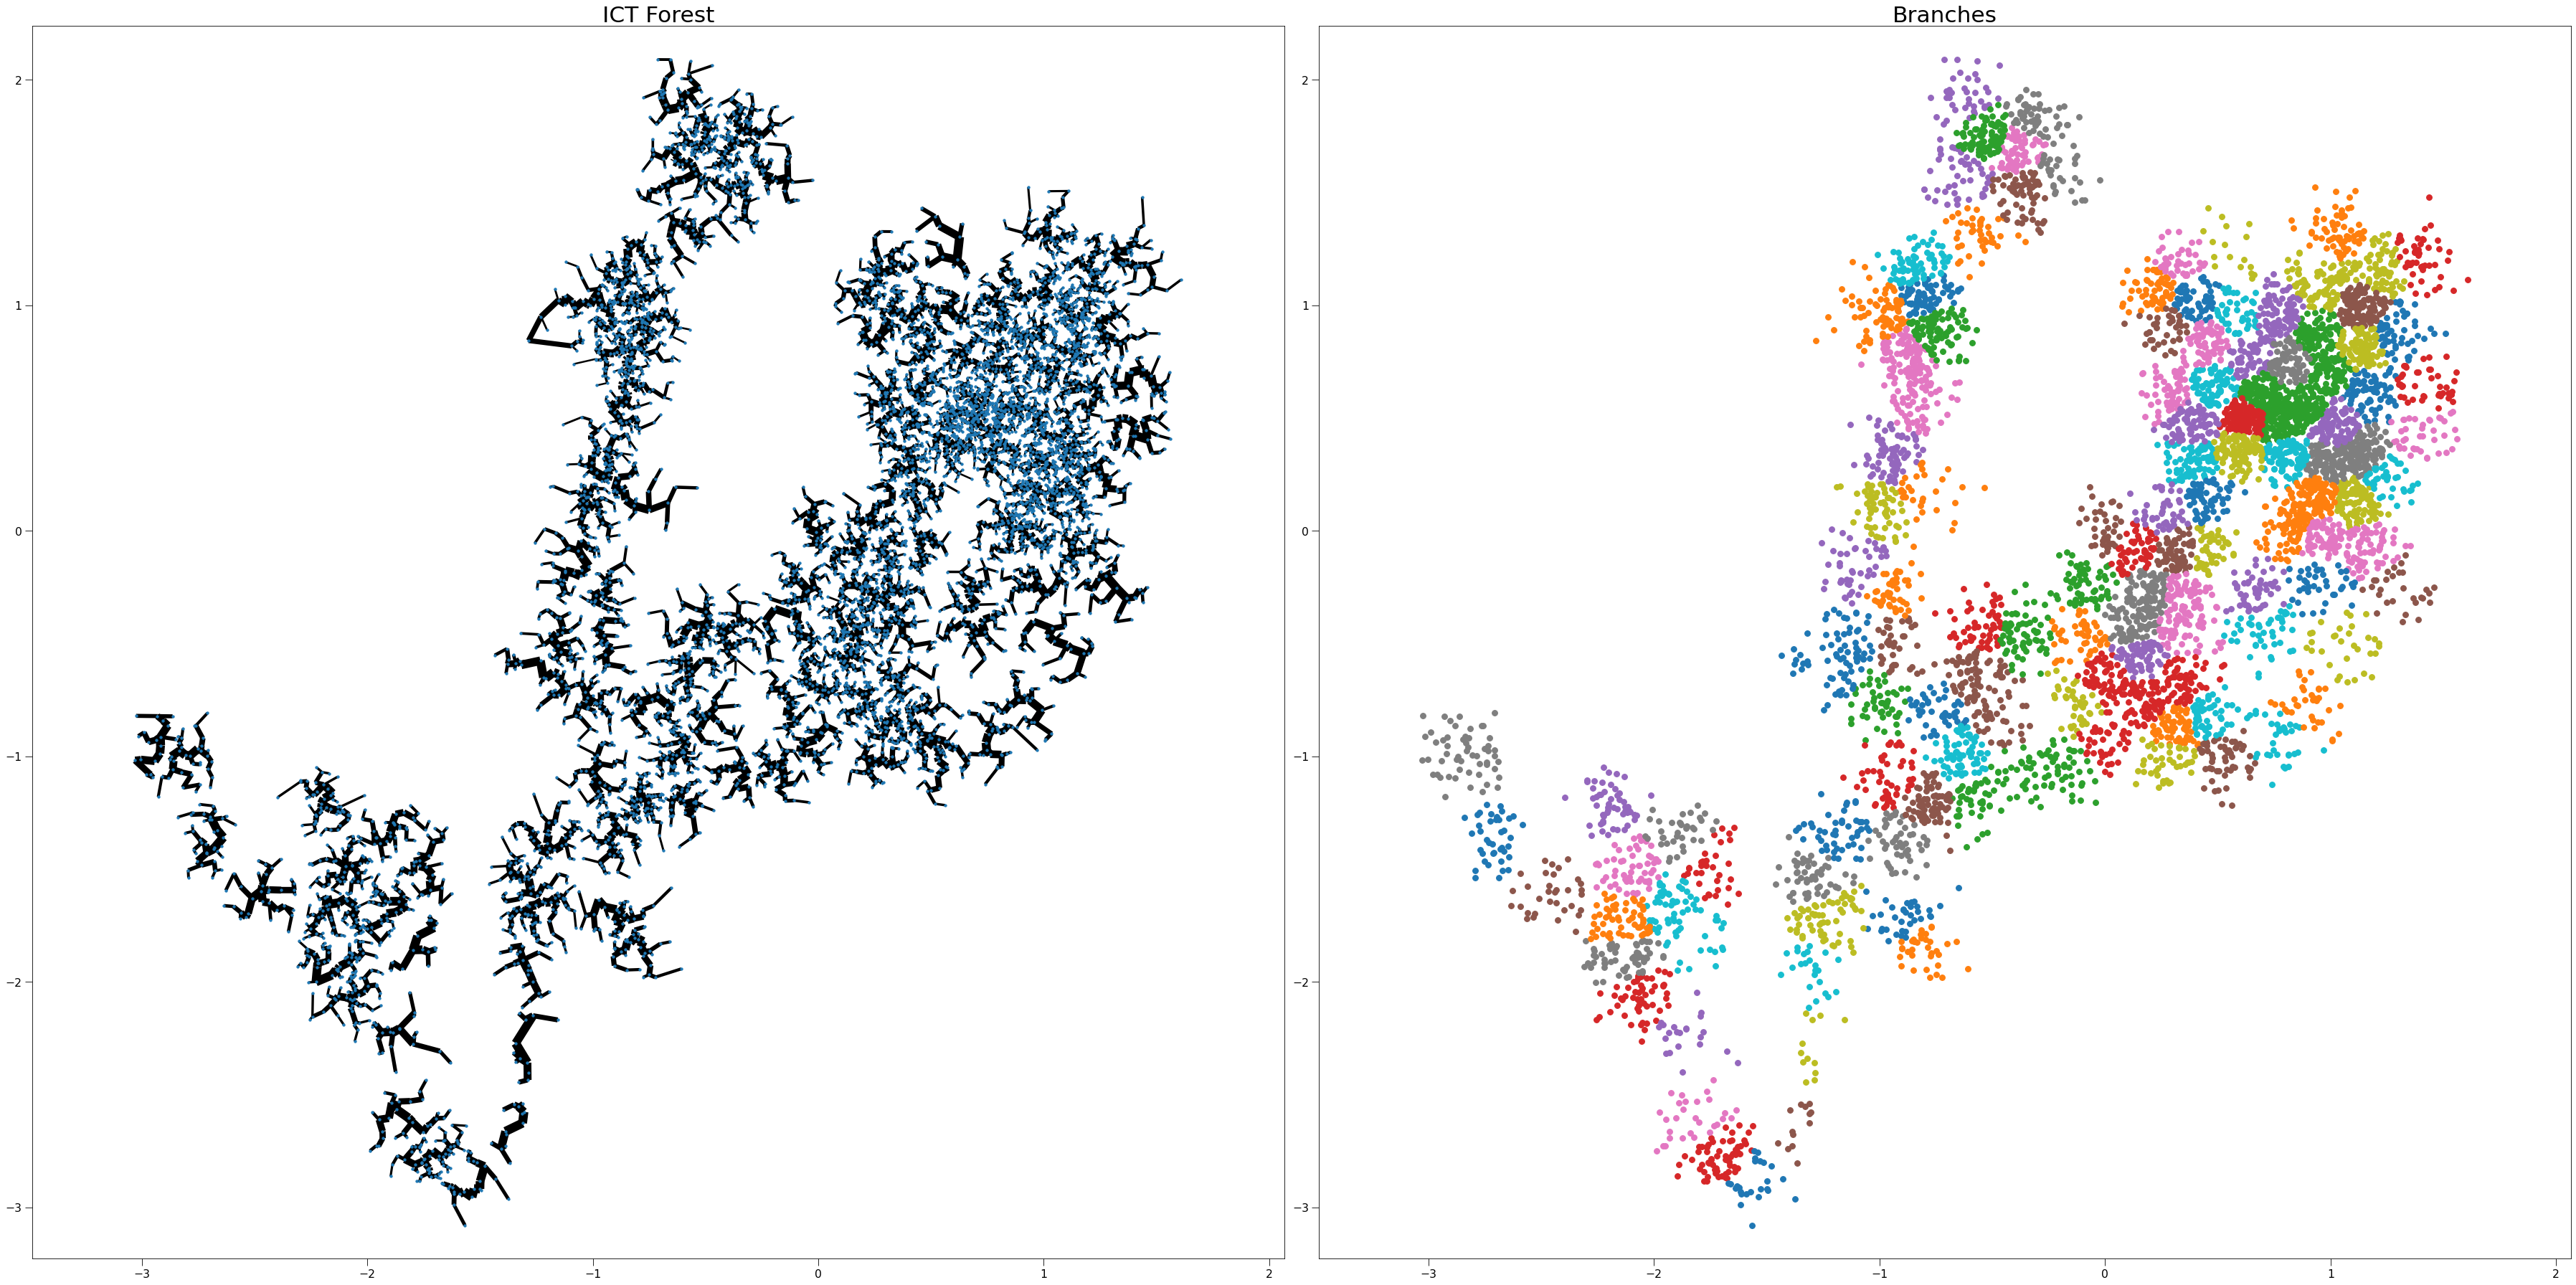

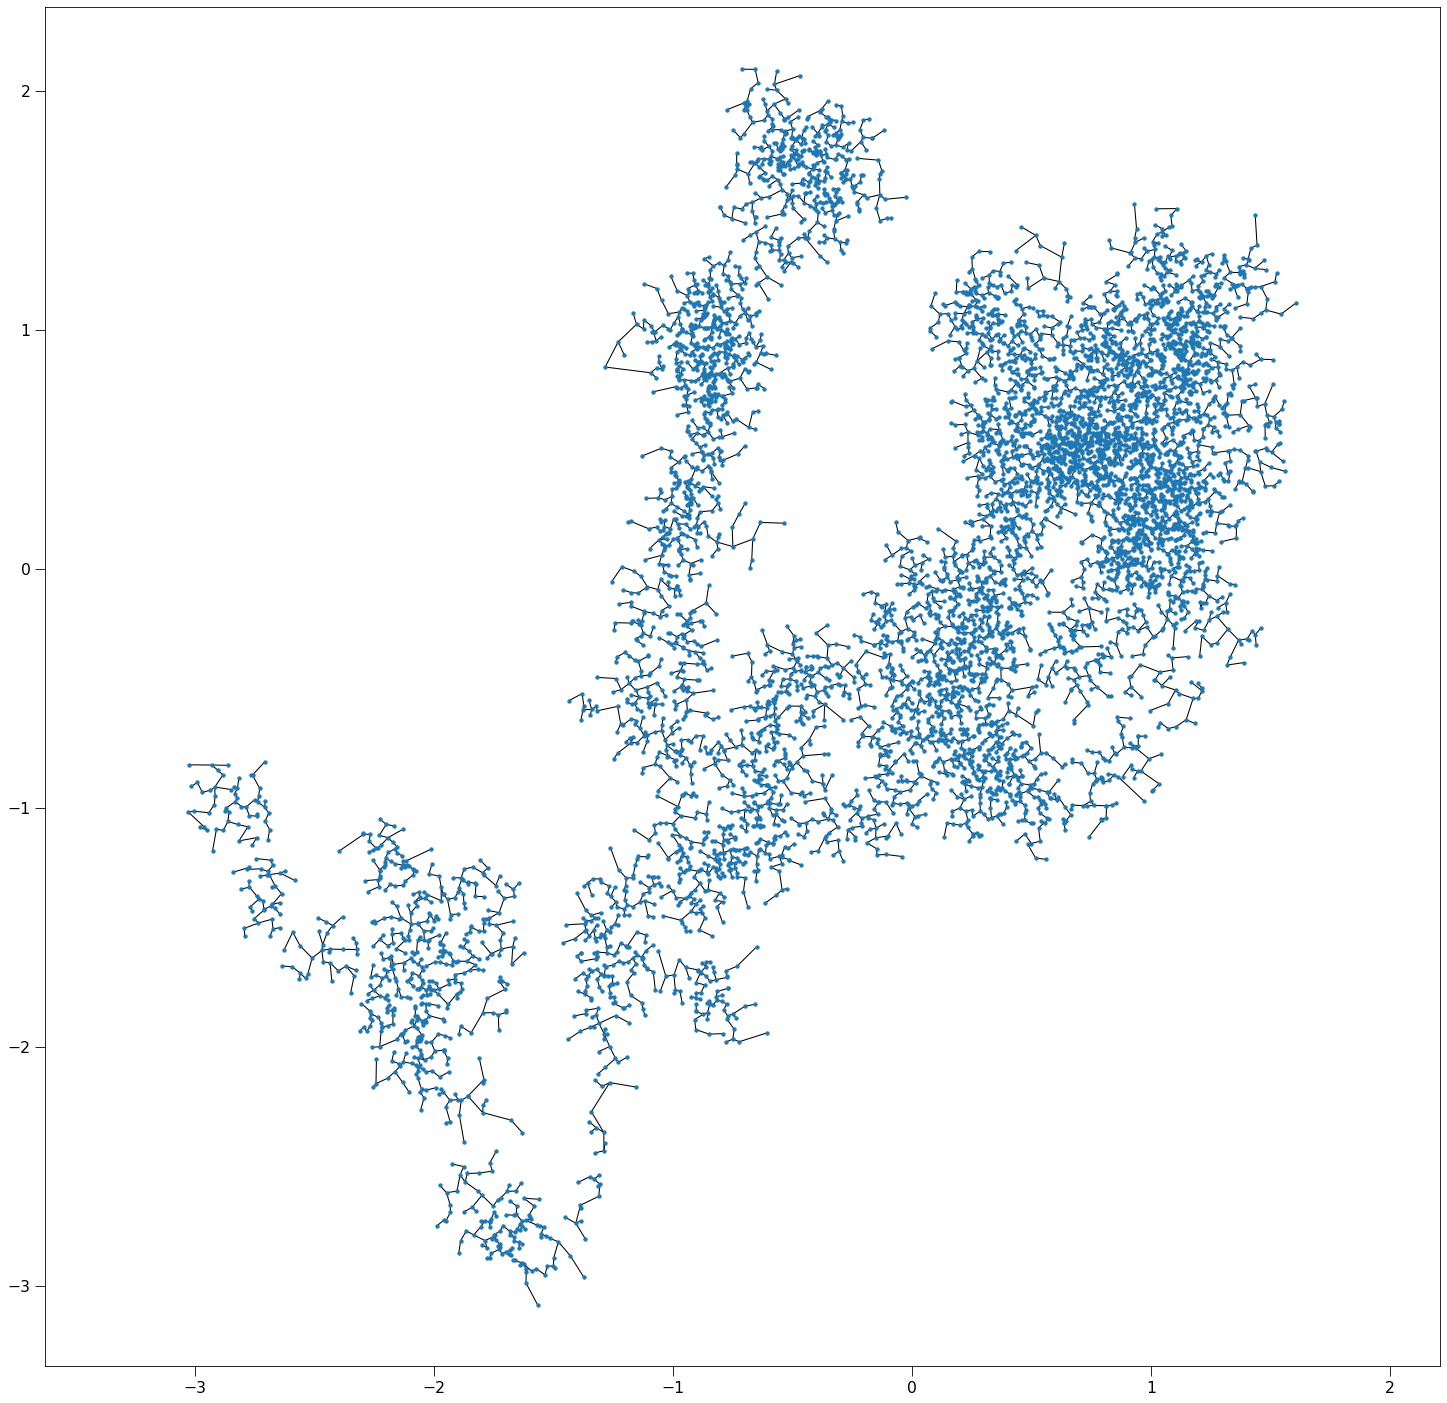

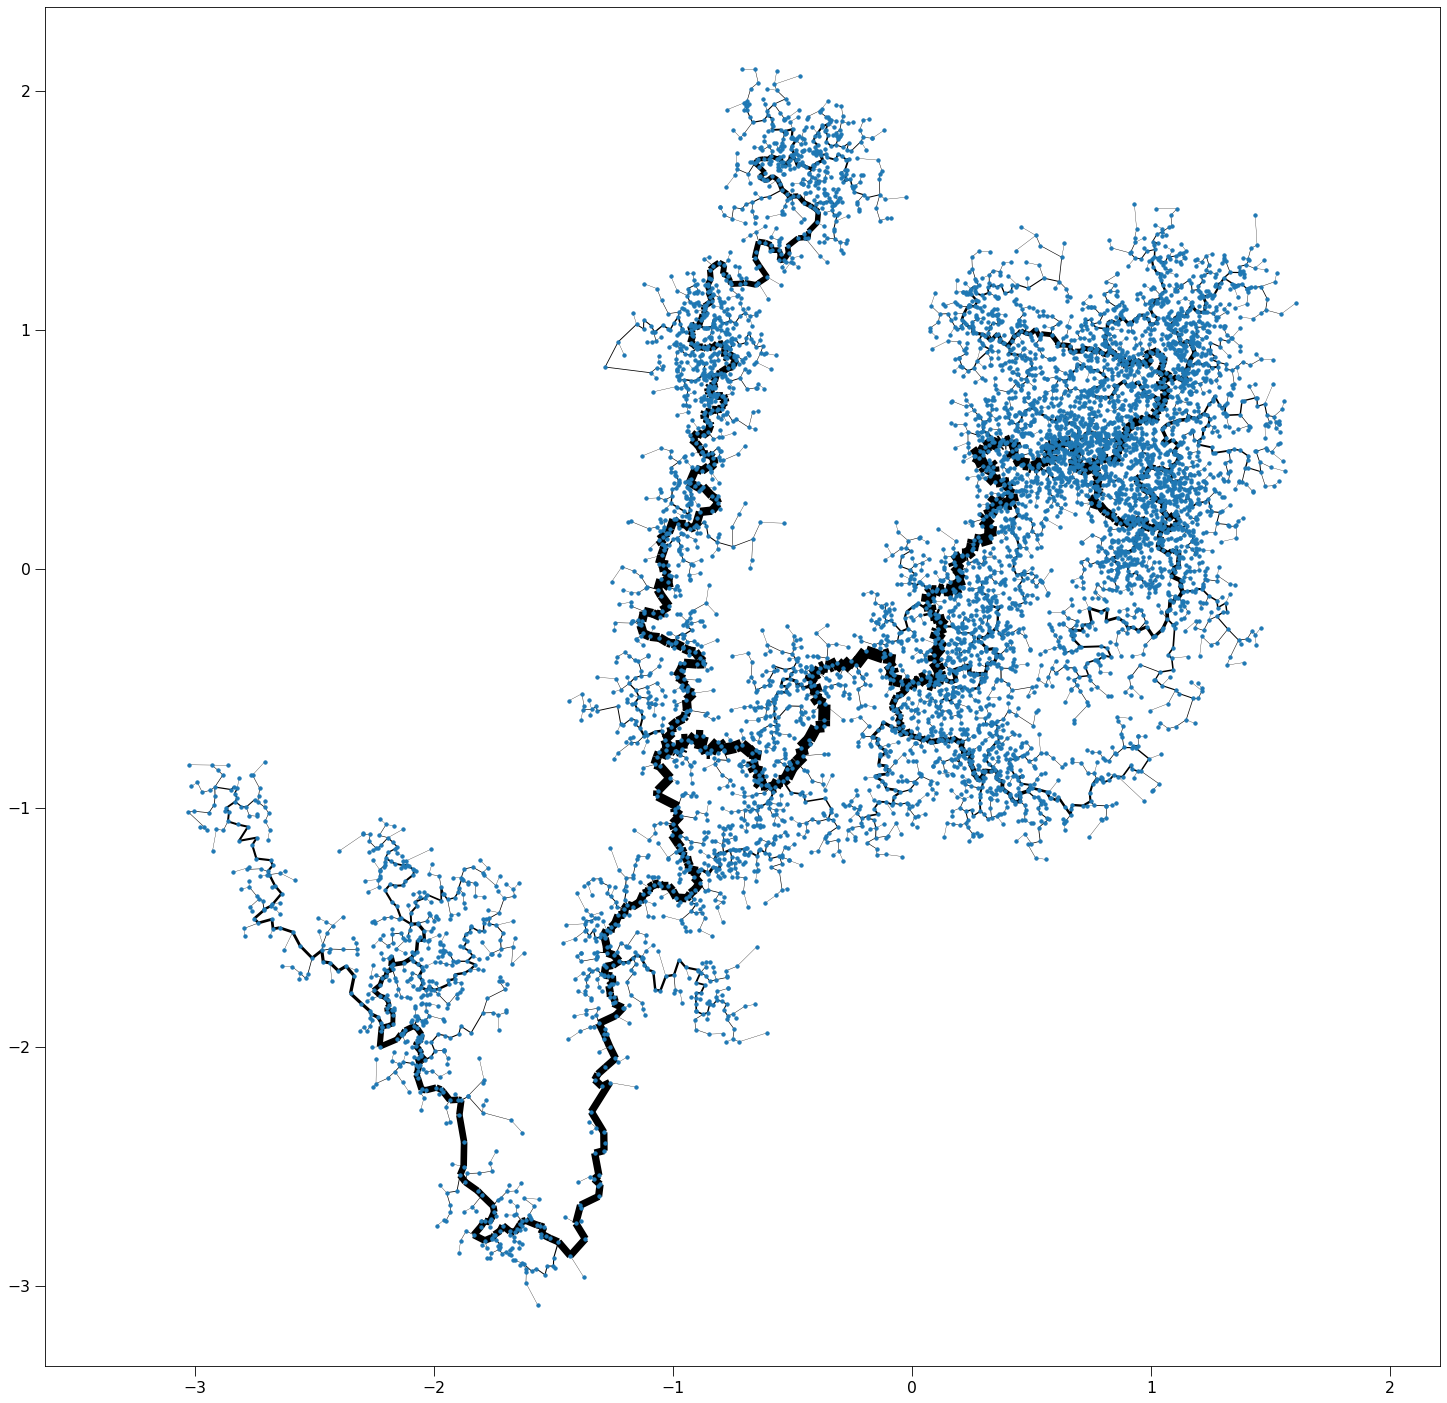

In [5]:
graphs = sub_ICTs
widths = []
for sub_ICT in sub_ICTs:
    widths.append(compute_widths(sub_ICT))
    
names = ["ICT Forest", "Branches"]

number_of_plots = 2
fig, ax = plt.subplots(1,2, figsize=(24*2,24))

for i, component in enumerate(components):
    nk.viztasks.drawGraph(graphs[i], pos=position[component], ax=ax[0], width=widths[i], node_size=10)
            

for component in components:
    ax[1].plot(*position[component].T)
    
for i, name in enumerate(names):
    ax[i].set_title(name)
    ax[i].axis("equal")
    ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax[i].set_axis_on()
    
    
plt.tight_layout()
plt.show()

from sklearn.metrics import pairwise_distances

G = nk.graph.Graph(n=len(position), weighted=True)

distances = pairwise_distances(position, position)

for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        G.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
# plot the not connected graph
fig, ax = plt.subplots(1, figsize=(24,24))
nk.viztasks.drawGraph(G, pos=position, ax=ax, node_size=10)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_axis_on()
ax.axis("equal")
plt.show()

G = patch_together_nearest(G, position)
G.indexEdges()

# plot the connected graph
fig, ax = plt.subplots(1, figsize=(24,24))
nk.viztasks.drawGraph(G, pos=position, ax=ax, width=compute_widths(G), node_size=10)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_axis_on()
ax.axis("equal")
plt.show()

In [6]:
# calculate the cluster ICT with all aim nodes
start = time.time()
ICT_cluster_all = calculate_ICT(G, algorithm_type="cluster_all", cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT_cluster_all.indexEdges()

# widths of the edges
widths_cluster_all = compute_widths(ICT_cluster_all)
print(time.time()-start)

update Arr 7499 -> 7499
added 1951 edges early
added 5547 edges early

4.495811700820923


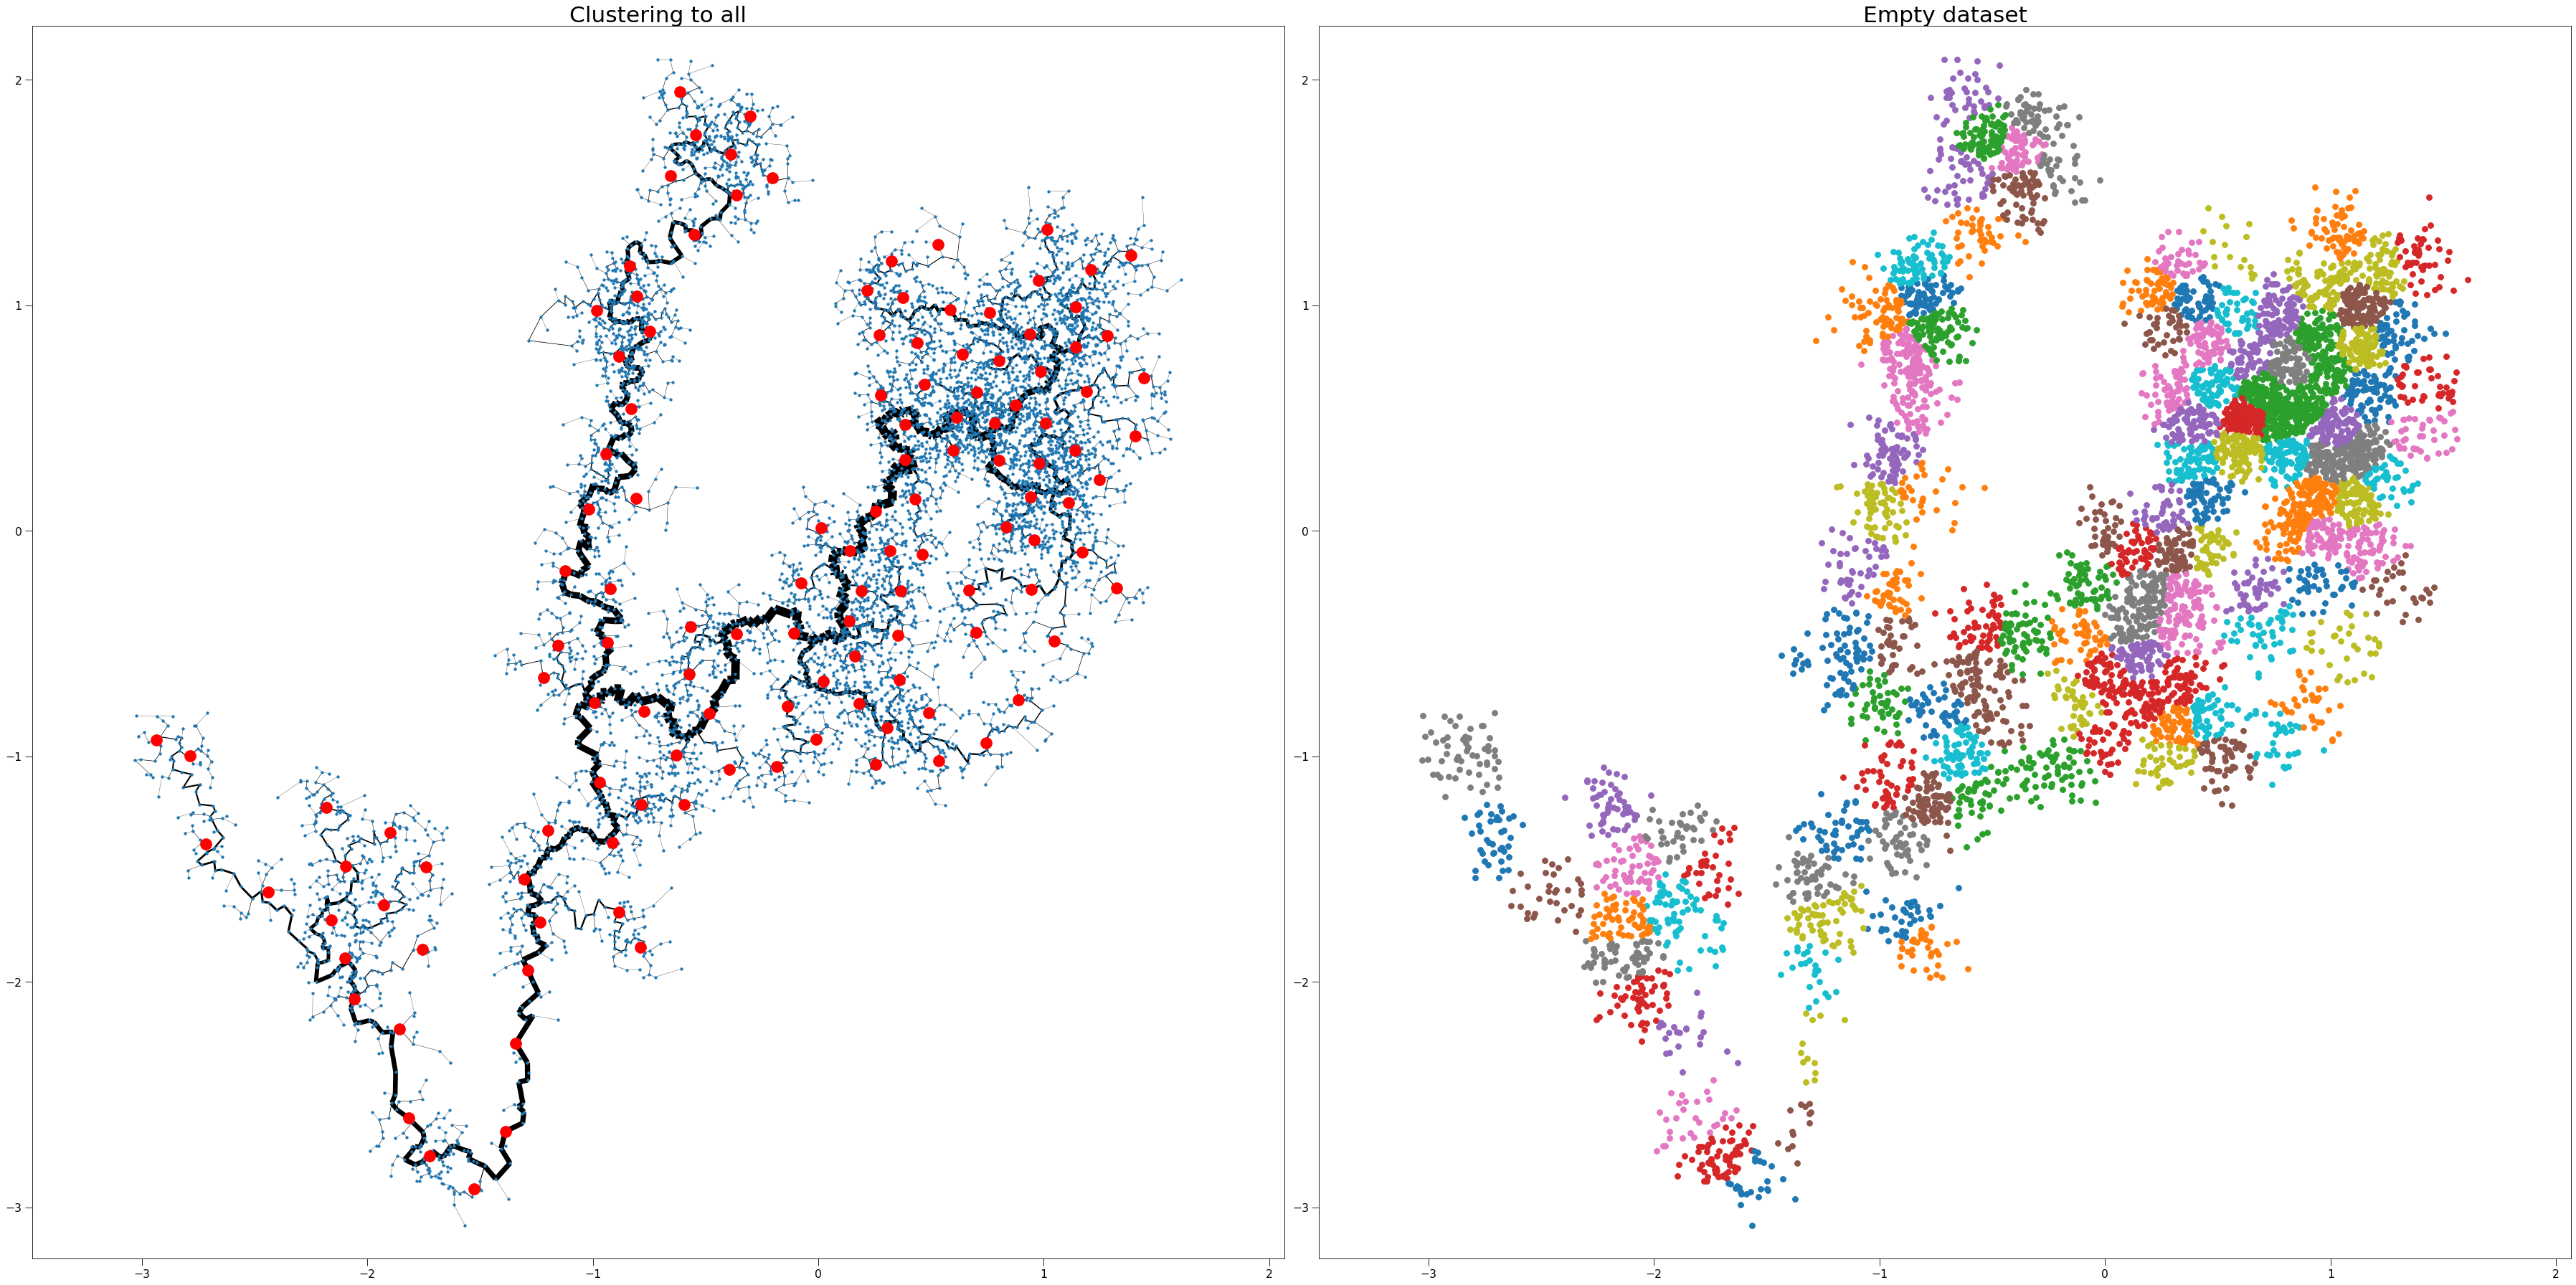

In [7]:
# plotting
graphs = [ICT_cluster_all]
widths = [widths_cluster_all]
names = ["Clustering to all", "Empty dataset"]


number_of_plots = len(names)
fig, ax = plt.subplots(1,2, figsize=(24*2,24))

if number_of_plots == 1:
    ax = [ax]
    
for i in range(number_of_plots):
    if i == 0:
        nk.viztasks.drawGraph(graphs[i], pos=position, ax=ax[i], width=widths[i], node_size=10)
        ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax[i].plot(*position[cluster_centers].T, marker="o", color = "Red")
        ax[i].set_axis_on()
    else:
        for label in range(len(labels)):
            plt.plot(*position[np.argwhere(labels == label).T[0]].T, label=label)
    ax[i].set_title(names[i])
    ax[i].axis("equal")
    
plt.tight_layout()
plt.savefig("./Output/Images/2D-phate-connect-to-nearest.png")
plt.show()